# Mohamad Tanwirul Akbar_202131066

## KNN : K-Nearest Neighbors

In [1]:
# Melakukan Import library pandas untuk mengolah data dengan format .csv
import pandas as pd

In [2]:
# Simpan nilai data file .csv pada Variabel datauts
datauts = pd.read_csv('K01_heart_disease.csv')
datauts

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
datauts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Preprocessing Data

In [4]:
datauts["Sex"].unique()

array(['M', 'F'], dtype=object)

In [5]:
datauts["ChestPainType"].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [6]:
datauts["RestingECG"].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [7]:
datauts["ExerciseAngina"].unique()

array(['N', 'Y'], dtype=object)

In [8]:
datauts["ST_Slope"].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
# mengubah nilai dari kolom tipe string/object menjadi numerik
for col in ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]:
    label_encoder = LabelEncoder()
    
    datauts[col] = label_encoder.fit_transform(datauts[col])

In [11]:
datauts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


In [12]:
x = datauts.drop(["HeartDisease"], axis=1)
y = datauts['HeartDisease']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=0)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
print("Akurasi Model Data :{}".format(knn.score(x_test,y_test)*100))

Akurasi Model Data :67.3913043478261


C:\Users\A\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [16]:
datauts.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


## Testing Data

In [17]:
data_baru = ([[40,1,2,145,250,1,2,112,1,1.5,1]])

In [18]:
hasil_prediksi = knn.predict(data_baru)

C:\Users\A\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\A\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [19]:
print("Hasil Prediksi: {}".format(hasil_prediksi))

Hasil Prediksi: [1]


## Visualisasi Data

C:\Users\A\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.60      0.61      0.61       113
           1       0.73      0.72      0.72       163

    accuracy                           0.67       276
   macro avg       0.66      0.66      0.66       276
weighted avg       0.67      0.67      0.67       276



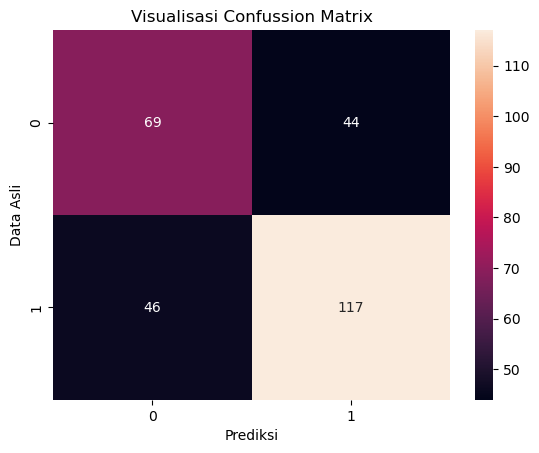

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

KNNpred = knn.predict(x_test)

#Actual value and the predicted value
datauts = pd.DataFrame({'Nilai Asli': y_test, 'Hasil Prediksi': KNNpred})
datauts.head()

#Confusion matrix and classification report
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, KNNpred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Visualisasi Confussion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Data Asli')
print(classification_report(y_test, KNNpred))

In [21]:
# Dari Visualisasi data matrix tersebut dapat disimpulkan bahwa 
# terdapat 44+46 = 90 Data yang salah prediksi dari total 276 total data test
# dimana data test diambil 30% dari keseluruhan data yaitu 918 baris data
# Maka akurasi dari Model pengolahan KNN pada dataset penyakit jantung ini hanya mencapai 67,...% 